In [1]:
from TinkoffAPI_module.client import MyClient

client = MyClient()
for stock, info in client.get_my_stocks().items():
    print(stock)
    print(f"figi={info['figi']}")

Сбер Банк - привилегированные акции
figi=BBG0047315Y7
Роснефть
figi=BBG004731354
ЛУКОЙЛ
figi=BBG004731032
РУСАЛ
figi=BBG008F2T3T2
Доллар США
figi=BBG0013HGFT4


In [2]:
client.sell_stock(figi="BBG008F2T3T2", lots=1)

Succesfully made market order to sell stock with figi = BBG008F2T3T2


{'payload': {'commission': {'currency': 'RUB', 'value': 0.0},
             'executed_lots': 1,
             'message': None,
             'operation': 'Sell',
             'order_id': '31286233655',
             'reject_reason': None,
             'requested_lots': 1,
             'status': 'Fill'},
 'status': 'Ok',
 'tracking_id': '3be9824256ac76e6'}

In [3]:
client.buy_stock(figi="BBG008F2T3T2", lots=1)

Succesfully made market order to buy stock with figi = BBG008F2T3T2


{'payload': {'commission': {'currency': 'RUB', 'value': 0.0},
             'executed_lots': 1,
             'message': None,
             'operation': 'Buy',
             'order_id': '31286263310',
             'reject_reason': None,
             'requested_lots': 1,
             'status': 'Fill'},
 'status': 'Ok',
 'tracking_id': '19522ed451d3b843'}

In [1]:
from dataproccesing import dp 
from model import model
from datetime import datetime
import torch
from torch.optim import Adam

loss_fn = torch.nn.MSELoss(reduction="mean")
m = model.GRU(
    input_dim = 19,
    hidden_dim = 20,
    num_layers = 1,
    output_dim = 1
)
opt_adam = Adam(m.parameters())
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt_adam, 10, eta_min=0, last_epoch=- 1, verbose=False)

start = datetime(2018, 1, 1)
train_dl, test_dl = dp.get_dataloaders("SBER.ME", start, 20, 50)
losses = model.train(m, train_dl, 200, opt_adam, loss_fn)

c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Loss: 0.00020972549100406468
Epoch: 1 | Loss: 0.00029651474324055016
Epoch: 2 | Loss: 0.00010695576929720119
Epoch: 3 | Loss: 0.0004914933815598488
Epoch: 4 | Loss: 0.00029217888368293643
Epoch: 5 | Loss: 0.0005879367818124592
Epoch: 6 | Loss: 0.0003330511972308159
Epoch: 7 | Loss: 0.00017450563609600067
Epoch: 8 | Loss: 9.88385290838778e-05
Epoch: 9 | Loss: 6.46992921247147e-05
Epoch: 10 | Loss: 5.045382567914203e-05
Epoch: 11 | Loss: 4.587184594129212e-05
Epoch: 12 | Loss: 4.633645949070342e-05
Epoch: 13 | Loss: 4.973076647729613e-05
Epoch: 14 | Loss: 5.496538142324425e-05
Epoch: 15 | Loss: 6.12635412835516e-05
Epoch: 16 | Loss: 6.810673221480101e-05
Epoch: 17 | Loss: 7.504651148337871e-05
Epoch: 18 | Loss: 8.177976997103542e-05
Epoch: 19 | Loss: 8.804559183772653e-05
Epoch: 20 | Loss: 9.367534221382812e-05
Epoch: 21 | Loss: 9.853891242528334e-05
Epoch: 22 | Loss: 0.00010258043766953051
Epoch: 23 | Loss: 0.0001057914414559491
Epoch: 24 | Loss: 0.00010824054334079847
Epoch:

In [2]:
def test(model,
         test_dl: torch.utils.data.DataLoader):
    r"""

    Args:
        model:
        test_dl:
        metrics:
        metrics_funcs:

    Returns:
        predictions: list of predictions for testing data
        true_values: list of true labels for testing data

    Testing cycle for HailNet

    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    with torch.no_grad():
        model.eval()
        predictions = []
        true_values = []
        for xt, yt in test_dl:
            xt, yt = xt.to(device), yt.to(device)
            predictions.append(model(xt))
            true_values.append(yt)
    return predictions, true_values

In [5]:
preds, true_values = test(m, test_dl)

In [9]:
for x, y in train_dl:
    print(x)
    print(y)
    break

tensor([[231.9000, 238.8000, 238.6000, 240.4000, 237.7600, 239.0000, 237.7500,
         238.8500, 239.6400, 239.8200, 245.5000, 242.4500, 243.9900, 247.5300,
         250.6400, 247.0000, 250.4800, 257.8000, 264.5000]])
tensor([[263.2000]])


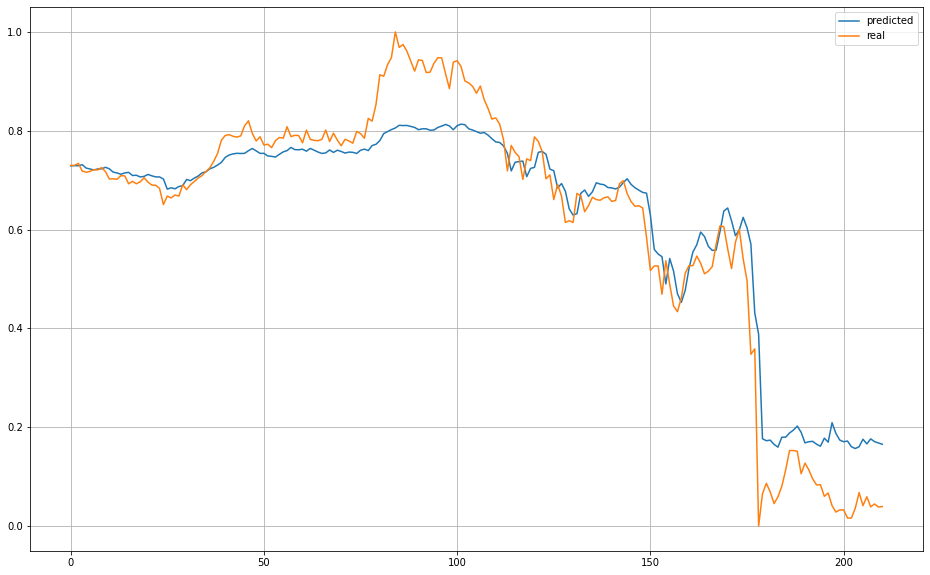

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.plot([i for i in range(len(preds))], preds, label="predicted")
plt.plot([i for i in range(len(preds))], true_values, label="real")
plt.legend()

plt.grid()
plt.show()